In [3]:
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, '../')
from transform_attention_weights_lib import transform_attention_weights
from aggregation_sentence_information_lib import aggregate_weight_information_for_sentences

In [4]:
weights = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\pretrained_attention_weights.npy")
parent_idx = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\parent_idx.npy")
scores = np.load(r"E:\graphsum\data\attention_weights_with_meta_information\scores.npy")
result_dict = pickle.load(open(r"E:\graphsum\data\attention_weights_with_meta_information\save_dict" ,"rb"))


In [86]:
result_dict["beam_length"]

array([[208., 206., 220., 222., 300.],
       [260., 300., 300., 300., 300.],
       [300., 300., 300., 300., 300.],
       [210., 264., 261., 300., 300.],
       [288., 290., 290., 300., 300.],
       [291., 290., 300., 300., 300.],
       [215., 215., 229., 234., 235.],
       [253., 268., 274., 277., 278.],
       [203., 204., 207., 203., 209.],
       [269., 269., 294., 298., 300.]])

In [5]:
finished_scores_array = result_dict["scores_array"]

In [6]:
cleaned_weight_matrix, cleaned_score_matrix = transform_attention_weights(weights, parent_idx, scores, result_dict)

In [58]:
r = aggregate_weight_information_for_sentences(cleaned_weight_matrix, result_dict)

In [24]:
example_0  = cleaned_weight_matrix[0,0,:208,:,:,:]

In [25]:
example_0.shape

(208, 8, 8, 30)

In [39]:
multi_heads = [example_0[:,:,i,:].reshape(-1,) for i in range(8)]

In [41]:
np.array(multi_heads).shape

(8, 49920)

In [46]:
np.min(np.corrcoef(multi_heads))

0.3457039385563825

In [53]:
np.mean(np.corrcoef(multi_heads))

0.6376400373952814

In [47]:
np.max(np.corrcoef(multi_heads))

1.0

In [48]:
decoding_layers = [example_0[:,i,:,:].reshape(-1,) for i in range(8)]

In [98]:
def prepare_input(input_matrix, meta_information):
    
    decoding_layers = [[] for i in range(8)]
    
    multi_heads = [[] for i in range(8)]
    
    num_examples = input_matrix.shape[0]
    
    for idx in range(num_examples):
        beam_length = meta_information[idx][0]
        
        
        ex = input_matrix[idx,0,:int(beam_length),:,:,:]
        
        for j in range(8):
            decoding_layers[j].extend(ex[:,j,:,:].reshape(-1,))
            multi_heads[j].extend(ex[:,:,j,:].reshape(-1,))
            
    return decoding_layers, multi_heads
        
        

In [104]:
def calculate_correlation(multi_heads, decoding_layers):    
    
    multi_head_corr = np.corrcoef(multi_heads)
    
    decoding_layers_corr = np.corrcoef(decoding_layers)
    
    print(f"Multi-Head: mean {np.mean(multi_head_corr)} | min {np.min(multi_head_corr)} ")
    
    plt.figure()
    plt.imshow(multi_head_corr)
    plt.colorbar()
    plt.show()
    
    print(f"Decoding-Layer: mean {np.mean(decoding_layers_corr)} | min {np.min(decoding_layers_corr)} ")
    
    plt.figure()
    plt.imshow(decoding_layers_corr)
    plt.colorbar()
    plt.show()
    
    
    
    return multi_head_corr, decoding_layers_corr
    

In [103]:
token_decoding,token_multi_head  = prepare_input(cleaned_weight_matrix, result_dict["beam_length"])

Multi-Head: mean 0.7075962705627366 | min 0.49053456748357904 


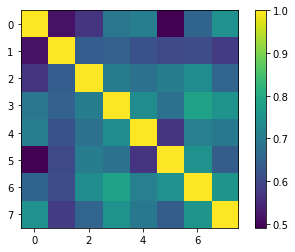

Decoding-Layer: mean 0.5231908250639076 | min 0.22648976291268164 


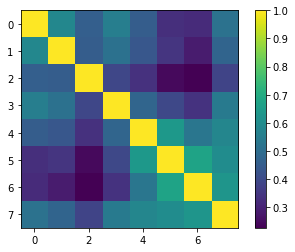

In [105]:
t_m,t_d = calculate_correlation(token_multi_head, token_decoding)

Multi-Head: mean 0.7276282314331988 | min 0.4110441506195188 


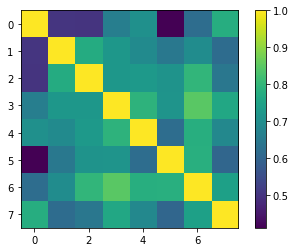

Decoding-Layer: mean 0.4964793528775562 | min 0.1200007176712782 


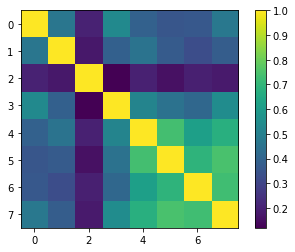

In [80]:
m,d = calculate_correlation(r["Mean"][0,0,:6,:,:,:])

In [69]:
np.mean(m)

0.7276282314331988

In [70]:
np.mean(d)

0.4964793528775562